In [2]:
library(bit64)
library(data.table)
library(ggplot2)

Loading required package: bit
Attaching package bit
package:bit (c) 2008-2012 Jens Oehlschlaegel (GPL-2)
creators: bit bitwhich
coercion: as.logical as.integer as.bit as.bitwhich which
operator: ! & | xor != ==
querying: print length any all min max range sum summary
bit access: length<- [ [<- [[ [[<-
for more help type ?bit

Attaching package: 'bit'

The following object is masked from 'package:base':

    xor

Attaching package bit64
package:bit64 (c) 2011-2012 Jens Oehlschlaegel (GPL-2 with commercial restrictions)
creators: integer64 seq :
coercion: as.integer64 as.vector as.logical as.integer as.double as.character as.bin
logical operator: ! & | xor != == < <= >= >
arithmetic operator: + - * / %/% %% ^
math: sign abs sqrt log log2 log10
math: floor ceiling trunc round
querying: is.integer64 is.vector [is.atomic} [length] is.na format print
aggregation: any all min max range sum prod
cumulation: diff cummin cummax cumsum cumprod
access: length<- [ [<- [[ [[<-
combine: c rep cbind r

In [3]:
setwd('/Users/schioand/leave_academia/kaggle/expedia/code')

In [4]:
source('utils.R')

In [5]:
dfAll <- fread('../subm//self-leak-16-5-16.csv')

Read 2528243 rows and 13 (of 13) columns from 0.089 GB file in 00:00:03


In [12]:
dfAll$hotel_cluster <- apply(dfAll, 1, function(x) paste(x[2:6], collapse = ' '))

In [13]:
head(dfAll)

,id,hsugg0,hsugg1,hsugg2,hsugg3,hsugg4,hsugg5,hsugg6,odMarUlc,odUlc,srcDest,Mar,Top,hotel_cluster
1,0,5,37,55,11,22,8,41,0,0,7,0,0,5 37 55 11 22
2,1,5,91,41,48,64,65,98,0,0,1,0,6,5 91 41 48 64
3,2,91,0,31,77,96,59,48,1,0,6,0,0,91 0 31 77 96
4,3,1,45,79,24,54,88,51,1,0,6,0,0,1 45 79 24 54
5,4,50,51,2,91,42,59,48,2,0,5,0,0,50 51 2 91 42
6,5,91,42,28,4,48,95,16,0,0,7,0,0,91 42 28 4 48


In [17]:
write.table(dfAll[, c('id', 'hotel_cluster'), with = FALSE], file = '../subm/self-leak-16-5-19.csv', sep = ",", row.names=FALSE, quote=FALSE, na = "") 

In [9]:
names(dfAll)

[1] "id"                           "hotel_cluster"               
 [3] "user_id"                      "date_time"                   
 [5] "site_name"                    "posa_continent"              
 [7] "user_location_country"        "user_location_region"        
 [9] "user_location_city"           "orig_destination_distance"   
[11] "is_mobile"                    "is_package"                  
[13] "channel"                      "srch_ci"                     
[15] "srch_co"                      "srch_adults_cnt"             
[17] "srch_children_cnt"            "srch_rm_cnt"                 
[19] "srch_destination_id"          "srch_destination_type_id"    
[21] "is_booking"                   "cnt"                         
[23] "hotel_continent"              "hotel_country"               
[25] "hotel_market"                 "num_continents"              
[27] "num_orig_city"                "num_orig_country"            
[29] "num_orig_region"              "num_srch_destination_id"     
[31] "num_srch_destination_type_id" "train_events"                
[33] "train_mean_booking"           "train_sd_booking"            
[35] "train_num_bookings"           "train_num_nonbookings"       
[37] "date_time_asdate"             "srch_ci_asdate"              
[39] "srch_co_asdate"               "date_time_month"             
[41] "date_time_mday"               "srch_ci_month"               
[43] "srch_ci_mday"                 "srch_co_month"               
[45] "srch_co_mday"                 "date_time_hour"              
[47] "srch_c_diff_weeks"            "srch_c_diff_days"            
[49] "srch_c_diff_hours"            "datetime_diff_weeks"         
[51] "datetime_diff_days"           "datetime_diff_hours"

In [10]:
dim(dfAll)

[1] 6701583      52

In [6]:
require(dplyr)

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [11]:
dfAll[, table(factor(num_srch_destination_id))]


     1      2      3      4      5      6      7      8      9     10     11 
201857 332493 361265 360346 346421 335134 317163 291057 273872 255364 240397 
    12     13     14     15     16     17     18     19     20     21     22 
225289 205725 200561 181621 166105 160698 140971 134257 125121 113757 106198 
    23     24     25     26     27     28     29     30     31     32     33 
100387  87357  89602  83635  83332  74650  61443  63093  56515  55103  53436 
    34     35     36     37     38     39     40     41     42     43     44 
 42732  42489  43633  40684  34829  32828  34475  32498  28629  25270  24003 
    45     46     47     48     49     50     51     52     53     54     55 
 19009  24204  20006  19100  16209  17755  13406  16052  16119  11823  11224 
    56     57     58     59     60     61     62     63     64     65     66 
 13347  12053  13021  11306  11881   9323   8443   8385  10546   6567   7612 
    67     68     69     70     71     72     73     74     75 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


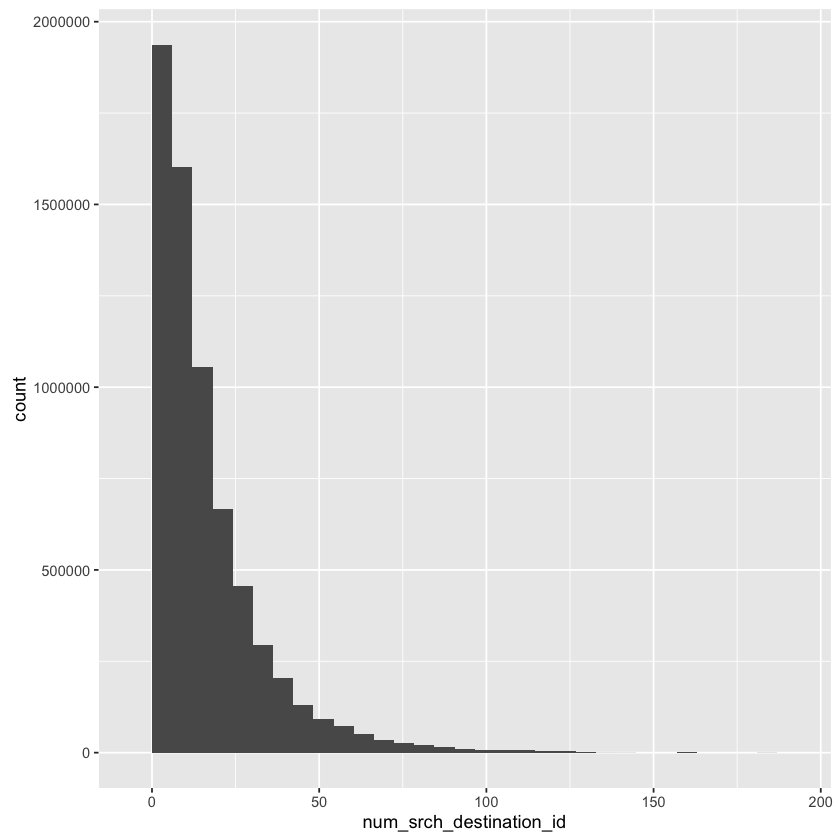

In [13]:
qplot(num_srch_destination_id, data = dfAll, geom = 'histogram')

In [14]:
dfAll[, table(factor(srch_destination_id))]


     0      1      3      4      8      9     10     11     12     14     16 
     1     18      3    258    539     49      9    101      1     72    122 
    18     19     21     23     24     25     26     27     28     30     31 
     5    467   2025      4    664   1071     31    894      1      6      3 
    32     33     37     38     40     41     42     43     44     46     48 
     6    921     12      7    223      3      7    704     10     15      9 
    49     50     51     53     54     55     56     57     58     59     61 
     1      3      9     23    153     10      4    111     22    301      5 
    62     64     66     68     69     70     72     73     75     76     77 
   224      3   1794   1607      9     92      6     32      1    267      3 
    78     80     81     82     83     84     85     86     87     88     89 
     5      3      7      5      2     23      7      2    437    381     12 
    90     91     92     93     94     95     96     97     98 

In [15]:
destination_sumry <- dfAll %>% select(srch_destination_id) %>% count(srch_destination_id)

In [16]:
head(destination_sumry)

,srch_destination_id,n
1,22494,79
2,14038,1086
3,53949,4567
4,18489,3405
5,18488,1961
6,21788,2189


In [17]:
summary(destination_sumry[,n])

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     1.0      2.0      6.0    176.3     26.0 232500.0 

In [18]:
head(which(dfAll$num_srch_destination_id == 3))

[1] 561 562 563 564 895 896

In [19]:
myuser <- dfAll[563, user_id]

In [26]:
dfAll[user_id == myuser, ]
mydest <- dfAll[user_id == myuser, srch_destination_id]
mydest

,id,hotel_cluster,user_id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,ellip.h,srch_ci_mday,srch_co_month,srch_co_mday,date_time_hour,srch_c_diff_weeks,srch_c_diff_days,srch_c_diff_hours,datetime_diff_weeks,datetime_diff_days,datetime_diff_hours
1,NA,4,14256,2014-05-28 10:38:44,2,3,66,288,48207,NA,<8b>,15,6,21,10,0.8571429,6,144,2.571429,18,432
2,NA,88,14256,2014-07-23 12:24:25,2,3,66,288,48207,NA,<8b>,31,8,3,12,0.4285714,3,72,1.142857,8,192
3,NA,88,14256,2014-07-23 12:27:44,2,3,66,288,48207,NA,<8b>,31,8,3,12,0.4285714,3,72,1.142857,8,192
4,NA,91,14256,2014-09-17 18:29:39,2,3,66,174,2360,376.9551,<8b>,18,9,19,18,0.1428571,1,24,0.1428571,1,24
5,1087440,NA,14256,2015-04-16 10:58:32,2,3,66,442,44774,1230.36,<8b>,21,6,27,10,0.8571429,6,144,9.428571,66,1584
6,1087441,NA,14256,2015-08-12 10:36:04,2,3,66,260,19022,1779.786,<8b>,20,8,21,10,0.1428571,1,24,1.142857,8,192


[1] 12175 23250 23250 44642 12175 11835

In [27]:
dim(dfAll[user_location_city %in% c(48207, 2360, 44744, 19022) & srch_destination_id %in% mydest, ] )

[1] 30 52

In [32]:
dfAll[user_location_city %in% c(48207, 2360, 44744, 19022) & srch_destination_id %in% mydest, 
     .(id, hotel_cluster, user_id, date_time, is_booking, user_location_city, srch_destination_id,
      orig_destination_distance, cnt)]

,id,hotel_cluster,user_id,date_time,is_booking,user_location_city,srch_destination_id,orig_destination_distance,cnt
1,NA,4,14256,2014-05-28 10:38:44,0,48207,12175,NA,1
2,NA,88,14256,2014-07-23 12:24:25,0,48207,23250,NA,1
3,NA,88,14256,2014-07-23 12:27:44,1,48207,23250,NA,1
4,NA,91,14256,2014-09-17 18:29:39,0,2360,44642,376.9551,1
5,NA,72,1102777,2014-09-14 19:24:39,0,2360,12175,41.9151,3
6,NA,72,1102777,2014-09-14 19:28:28,0,2360,12175,41.9151,1
7,NA,19,345516,2014-10-29 09:00:21,0,19022,12175,1797.066,1
8,NA,23,345516,2014-10-29 09:53:21,0,19022,12175,1797.046,1
9,NA,39,345516,2014-10-29 09:53:31,0,19022,12175,1795.977,1
10,NA,39,345516,2014-10-29 10:16:02,1,19022,12175,1795.977,1


In [33]:
dfAll[user_id == 14256, 
     .(id, hotel_cluster, user_id, date_time, is_booking, user_location_city, srch_destination_id,
      orig_destination_distance, cnt)]

,id,hotel_cluster,user_id,date_time,is_booking,user_location_city,srch_destination_id,orig_destination_distance,cnt
1,NA,4,14256,2014-05-28 10:38:44,0,48207,12175,NA,1
2,NA,88,14256,2014-07-23 12:24:25,0,48207,23250,NA,1
3,NA,88,14256,2014-07-23 12:27:44,1,48207,23250,NA,1
4,NA,91,14256,2014-09-17 18:29:39,0,2360,44642,376.9551,1
5,1087440,NA,14256,2015-04-16 10:58:32,1,44774,12175,1230.36,1
6,1087441,NA,14256,2015-08-12 10:36:04,1,19022,11835,1779.786,1


In [47]:
tmpOut <- dfAll %>% filter(srch_destination_id == 12175) %>% group_by(hotel_cluster) %>% select(id, hotel_cluster, user_id, date_time, is_booking, user_location_city, srch_destination_id,
      orig_destination_distance, cnt)
dim(tmpOut)

[1] 32294     9

In [51]:
tmpOut <- dfAll %>% filter(srch_destination_id == 12175) %>% group_by(orig_destination_distance) %>% 
    summarize(len = length(unique(hotel_cluster)))
summary(tmpOut)
tmpOut[len == 2, ]

 orig_destination_distance      len        
 Min.   :   0.036          Min.   : 1.000  
 1st Qu.: 331.392          1st Qu.: 1.000  
 Median : 647.888          Median : 1.000  
 Mean   :1038.619          Mean   : 1.067  
 3rd Qu.:1208.593          3rd Qu.: 1.000  
 Max.   :9364.809          Max.   :44.000  
 NA's   :1                                 

ERROR: Error in dimnames.data.table(x): data.table inherits from data.frame (from v1.5) but this data.table does not. Has it been created manually (e.g. by using 'structure' rather than 'data.table') or saved to disk using a prior version of data.table? The correct class is c('data.table','data.frame').


Source: local data table [758 x 2]

   orig_destination_distance   len
                       (dbl) (int)
1                  1526.1817     2
2                   956.1983     2
3                   956.3097     2
4                   982.6891     2
5                   982.0359     2
6                   984.7427     2
7                   982.5568     2
8                   982.4630     2
9                   982.1191     2
10                  982.4313     2
..                       ...   ...

In [15]:
dim(dfTrain)

[1] 6280497      52

In [14]:
dim(dfTest)

[1] 920036     52

In [26]:
dfAll <- fread('../data/train.csv')

Read 37670293 rows and 24 (of 24) columns from 3.791 GB file in 00:04:19


In [29]:
dfAll <- dfAll[is_booking == 1, ]
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3613568.0,193.0,24130671.0,1288.8,26542200.0,1417.6
Vcells,101524074.0,774.6,837346950.0,6388.5,829607907.0,6329.5


In [30]:
dfAll$id <- -c(1:dim(dfAll)[1])

In [31]:
dfTest <- fread('../data/test.csv')

Read 2528243 rows and 22 (of 22) columns from 0.258 GB file in 00:00:05


In [34]:
dfAll$is_booking <- NULL
dfTest$hotel_cluster <- NA

In [35]:
head(dfAll)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,ellip.h,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,id
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.264,12,0,1,<8b>,0,1,8250,1,1,2,50,628,1,-1
2,2014-02-27 18:01:32,2,3,66,318,52078,NA,756,0,1,<8b>,0,1,8291,1,1,2,50,191,2,-2
3,2013-06-15 15:38:05,30,4,195,548,56440,NA,1048,0,1,<8b>,0,1,1385,1,1,0,185,185,58,-3
4,2014-11-23 18:02:20,30,4,195,991,47725,NA,1048,0,0,<8b>,0,1,8803,1,1,3,151,69,36,-4
5,2014-01-03 16:30:17,2,3,66,462,41898,2454.859,1482,0,1,<8b>,0,2,12009,1,1,2,50,680,95,-5
6,2014-01-03 16:44:56,2,3,66,462,41898,2454.859,1482,0,1,<8b>,0,1,12009,1,1,2,50,680,95,-6


In [36]:
head(dfTest)

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,ellip.h,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market,hotel_cluster
1,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.057,1,1,<8b>,2016-05-23,2,0,1,12243,6,6,204,27,NA
2,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.292,1,1,<8b>,2016-05-15,2,0,1,14474,7,6,204,1540,NA
3,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.978,20,0,<8b>,2015-07-27,4,0,1,11353,1,2,50,699,NA
4,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.598,28,0,<8b>,2015-09-16,2,0,1,8250,1,2,50,628,NA
5,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,<8b>,2015-07-23,2,0,1,11812,1,2,50,538,NA
6,5,2015-07-21 11:58:45,2,3,66,311,48189,359.8521,51,0,<8b>,2015-07-24,4,0,2,11827,1,2,50,447,NA


In [38]:
dfTest$cnt <- NA

In [41]:
setdiff(names(dfAll), names(dfTest))

character(0)

In [42]:
dfMerge <- rbind(dfAll, dfTest)

In [44]:
first_cols <- c('id', 'hotel_cluster', 'user_id')
dfMerge <- dfMerge[, c(first_cols, setdiff(names(dfMerge), first_cols)), with = FALSE]

In [45]:
head(dfMerge)

,id,hotel_cluster,user_id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,ellip.h,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market
1,-1,1,12,2014-08-11 08:22:12,2,3,66,348,48862,2234.264,<8b>,2014-09-02,2,0,1,8250,1,1,2,50,628
2,-2,2,756,2014-02-27 18:01:32,2,3,66,318,52078,NA,<8b>,2014-04-20,2,0,1,8291,1,1,2,50,191
3,-3,58,1048,2013-06-15 15:38:05,30,4,195,548,56440,NA,<8b>,2013-09-14,2,0,1,1385,1,1,0,185,185
4,-4,36,1048,2014-11-23 18:02:20,30,4,195,991,47725,NA,<8b>,2015-06-28,2,0,1,8803,1,1,3,151,69
5,-5,95,1482,2014-01-03 16:30:17,2,3,66,462,41898,2454.859,<8b>,2014-02-27,3,0,2,12009,1,1,2,50,680
6,-6,95,1482,2014-01-03 16:44:56,2,3,66,462,41898,2454.859,<8b>,2014-02-27,2,0,1,12009,1,1,2,50,680


In [46]:
write.table(dfMerge, '../feat/all-test-16-5-12.csv',
                              sep = ",", row.names=FALSE, quote=FALSE, na = "") 

## Put the leak in the train

In [1]:
library(data.table)

In [2]:
dfTrain <- fread('../data/train.csv')

Read 37670293 rows and 24 (of 24) columns from 3.791 GB file in 00:04:36


In [6]:
dfTest <- fread('../feat/all-out-16-5-12.csv')
dfTestAll <- fread('../feat//all-test-16-5-12.csv')

Read 5528936 rows and 16 (of 16) columns from 0.245 GB file in 00:00:04
Read 5528936 rows and 24 (of 24) columns from 0.583 GB file in 00:00:12


In [7]:
head(dfTrain)
head(dfTest)
head(dfTestAll)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,ellip.h,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
1,2014-08-11 07:46:59,2,3,66,348,48862,2234.264,12,0,1,<8b>,0,1,8250,1,0,3,2,50,628,1
2,2014-08-11 08:22:12,2,3,66,348,48862,2234.264,12,0,1,<8b>,0,1,8250,1,1,1,2,50,628,1
3,2014-08-11 08:24:33,2,3,66,348,48862,2234.264,12,0,0,<8b>,0,1,8250,1,0,1,2,50,628,1
4,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,<8b>,0,1,14984,1,0,1,2,50,1457,80
5,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,<8b>,0,1,14984,1,0,1,2,50,1457,21
6,2014-08-09 18:13:12,2,3,66,442,35390,911.5142,93,0,0,<8b>,0,1,14984,1,0,1,2,50,1457,92


,id,hsugg0,hsugg1,hsugg2,hsugg3,hsugg4,hsugg5,hsugg6,hsugg7,hsugg8,hsugg9,odMarUlc,odUlc,srcDest,Mar,Top
1,-1,1,45,79,24,54,88,51,71,49,19,1,0,9,0,0
2,-2,95,91,18,98,68,41,59,37,21,55,0,0,10,0,0
3,-3,58,75,63,90,44,31,62,86,81,30,0,0,10,0,0
4,-4,46,12,36,29,58,57,81,61,64,59,0,0,10,0,0
5,-5,95,91,48,42,77,59,32,16,33,94,1,0,9,0,0
6,-6,95,91,48,42,77,59,32,16,33,94,1,0,9,0,0


,id,hotel_cluster,user_id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,ellip.h,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market
1,-1,1,12,2014-08-11 08:22:12,2,3,66,348,48862,2234.264,<8b>,2014-09-02,2,0,1,8250,1,1,2,50,628
2,-2,2,756,2014-02-27 18:01:32,2,3,66,318,52078,NA,<8b>,2014-04-20,2,0,1,8291,1,1,2,50,191
3,-3,58,1048,2013-06-15 15:38:05,30,4,195,548,56440,NA,<8b>,2013-09-14,2,0,1,1385,1,1,0,185,185
4,-4,36,1048,2014-11-23 18:02:20,30,4,195,991,47725,NA,<8b>,2015-06-28,2,0,1,8803,1,1,3,151,69
5,-5,95,1482,2014-01-03 16:30:17,2,3,66,462,41898,2454.859,<8b>,2014-02-27,3,0,2,12009,1,1,2,50,680
6,-6,95,1482,2014-01-03 16:44:56,2,3,66,462,41898,2454.859,<8b>,2014-02-27,2,0,1,12009,1,1,2,50,680


In [8]:
dfTest <- dfTest[odMarUlc == 1, ]
dfTest <- merge(dfTest, dfTestAll, by = 'id')

In [10]:
dfTest <- dfTest[id > 0, ]
dfTest$hotel_cluster <- dfTest$hsugg0

In [20]:
dfTest$is_booking <- 3 # weight more
dfTest$cnt <- 1

In [22]:
dfTrain <- rbind(dfTrain, dfTest[, names(dfTrain), with = FALSE])

In [24]:
write.table(dfTrain, '../feat/self-leaked-train-15-5-16.csv',
                              sep = ",", row.names=FALSE, quote=FALSE, na = "") 

In [19]:
head(dfTest[, names(dfTrain), with = FALSE])

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,ellip.h,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
1,2015-06-07 15:53:02,2,3,66,142,17440,3975.978,20,0,0,<8b>,0,1,11353,1,2,1,2,50,699,91
2,2015-09-14 14:49:10,2,3,66,258,34156,1508.598,28,0,1,<8b>,0,1,8250,1,2,1,2,50,628,1
3,2015-11-07 12:29:09,2,3,66,311,48189,2337.675,51,0,0,<8b>,0,1,8250,1,2,1,2,50,628,88
4,2015-08-21 21:36:18,11,3,205,135,36086,7449.591,87,0,0,<8b>,0,1,8217,1,2,1,0,34,43,31
5,2015-05-28 19:44:39,2,3,66,174,5938,25.8282,98,0,0,<8b>,0,1,4406,3,2,1,2,50,368,39
6,2015-03-04 17:33:44,2,3,66,226,20170,911.1921,108,0,1,<8b>,0,1,8791,1,2,1,4,8,110,71


In [25]:
tail(dfTrain)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,ellip.h,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
1,2015-02-17 09:28:17,11,3,205,354,43201,55.2038,1198657,0,0,<8b>,0,1,26022,6,3,1,2,198,397,9
2,2015-03-19 06:49:47,2,3,66,311,38374,720.4032,1198670,0,1,<8b>,0,1,8229,1,3,1,2,50,678,25
3,2015-02-04 15:08:10,2,3,205,385,46963,955.8293,1198673,0,0,<8b>,0,1,8261,1,3,1,2,50,646,18
4,2015-11-12 18:54:48,2,3,66,442,35390,221.9894,1198717,0,0,<8b>,0,1,26956,6,3,1,2,50,408,7
5,2015-06-16 21:03:12,2,3,66,174,18037,2466.125,1198754,1,0,<8b>,1,1,8857,1,3,1,2,50,214,34
6,2015-03-14 01:31:37,2,3,66,442,17078,1077.228,1198771,0,0,<8b>,0,1,8250,1,3,1,2,50,628,54


## Routine : prepare files for the feature extractor

In [1]:
library(data.table)
dfAll <- fread('../data/train.csv')

Read 6701583 rows and 52 (of 52) columns from 1.465 GB file in 00:00:44


In [2]:
dfTest <- dfAll[is_booking == 1, ]

In [3]:
head(dfTest)

,id,hotel_cluster,user_id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,ellip.h,srch_ci_mday,srch_co_month,srch_co_mday,date_time_hour,srch_c_diff_weeks,srch_c_diff_days,srch_c_diff_hours,datetime_diff_weeks,datetime_diff_days,datetime_diff_hours
1,NA,43,2140,2013-01-10 18:30:08,37,1,69,923,23649,NA,<8b>,6,4,7,18,0.1428571,1,24,12.28571,86,2064
2,NA,25,2451,2013-12-02 04:30:54,24,2,3,64,12576,NA,<8b>,26,2,27,4,0.1428571,1,24,12.28571,86,2064
3,NA,10,2451,2014-12-28 20:38:09,24,2,3,64,9448,NA,<8b>,4,2,5,20,0.1428571,1,24,5.428571,38,912
4,NA,99,2451,2014-12-29 01:11:43,24,2,3,64,9448,NA,<8b>,10,2,11,1,0.1428571,1,24,6.142857,43,1032
5,NA,78,2451,2014-12-30 04:51:53,24,2,3,64,9448,NA,<8b>,7,2,8,4,0.1428571,1,24,5.571429,39,936
6,NA,8,2451,2014-12-30 08:56:35,24,2,3,64,9448,NA,<8b>,8,2,9,8,0.1428571,1,24,5.714286,40,960


In [4]:
dfTrain <- dfAll[!is.na(hotel_cluster), ]

In [8]:
head(dfTrain)

,id,hotel_cluster,user_id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,ellip.h,srch_ci_mday,srch_co_month,srch_co_mday,date_time_hour,srch_c_diff_weeks,srch_c_diff_days,srch_c_diff_hours,datetime_diff_weeks,datetime_diff_days,datetime_diff_hours
1,NA,82,2140,2013-01-10 18:04:37,37,1,69,923,23649,NA,<8b>,6,4,7,18,0.1428571,1,24,12.28571,86,2064
2,NA,43,2140,2013-01-10 18:24:37,37,1,69,923,23649,NA,<8b>,6,4,7,18,0.1428571,1,24,12.28571,86,2064
3,NA,43,2140,2013-01-10 18:26:40,37,1,69,923,23649,NA,<8b>,6,4,7,18,0.1428571,1,24,12.28571,86,2064
4,NA,43,2140,2013-01-10 18:30:08,37,1,69,923,23649,NA,<8b>,6,4,7,18,0.1428571,1,24,12.28571,86,2064
5,NA,43,2140,2013-01-10 18:30:27,37,1,69,923,23649,NA,<8b>,6,4,7,18,0.1428571,1,24,12.28571,86,2064
6,NA,82,2451,2013-12-01 21:59:08,24,2,3,64,12576,NA,<8b>,26,2,27,21,0.1428571,1,24,12.42857,87,2088


In [5]:
mids <- sum(is.na(dfTest$id))
mids

[1] 498950

In [6]:
dfTest[is.na(id), 'id'] <- -c(1:mids)

In [7]:
head(dfTest)

,id,hotel_cluster,user_id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,ellip.h,srch_ci_mday,srch_co_month,srch_co_mday,date_time_hour,srch_c_diff_weeks,srch_c_diff_days,srch_c_diff_hours,datetime_diff_weeks,datetime_diff_days,datetime_diff_hours
1,-1,43,2140,2013-01-10 18:30:08,37,1,69,923,23649,NA,<8b>,6,4,7,18,0.1428571,1,24,12.28571,86,2064
2,-2,25,2451,2013-12-02 04:30:54,24,2,3,64,12576,NA,<8b>,26,2,27,4,0.1428571,1,24,12.28571,86,2064
3,-3,10,2451,2014-12-28 20:38:09,24,2,3,64,9448,NA,<8b>,4,2,5,20,0.1428571,1,24,5.428571,38,912
4,-4,99,2451,2014-12-29 01:11:43,24,2,3,64,9448,NA,<8b>,10,2,11,1,0.1428571,1,24,6.142857,43,1032
5,-5,78,2451,2014-12-30 04:51:53,24,2,3,64,9448,NA,<8b>,7,2,8,4,0.1428571,1,24,5.571429,39,936
6,-6,8,2451,2014-12-30 08:56:35,24,2,3,64,9448,NA,<8b>,8,2,9,8,0.1428571,1,24,5.714286,40,960


In [11]:
write.table(dfTrain, '../feat/simplefea-batch-2-train-16-5-10.csv',
                              sep = ",", row.names=FALSE, quote=FALSE, na = "") 

In [12]:
write.table(dfTest, '../feat/simplefea-batch-2-test-16-5-10.csv',
                              sep = ",", row.names=FALSE, quote=FALSE, na = "") 

## Routine: merge benchmark with xgboost on subset of users

In [1]:
library(bit64)
library(data.table)

Loading required package: bit
Attaching package bit
package:bit (c) 2008-2012 Jens Oehlschlaegel (GPL-2)
creators: bit bitwhich
coercion: as.logical as.integer as.bit as.bitwhich which
operator: ! & | xor != ==
querying: print length any all min max range sum summary
bit access: length<- [ [<- [[ [[<-
for more help type ?bit

Attaching package: 'bit'

The following object is masked from 'package:base':

    xor

Attaching package bit64
package:bit64 (c) 2011-2012 Jens Oehlschlaegel (GPL-2 with commercial restrictions)
creators: integer64 seq :
coercion: as.integer64 as.vector as.logical as.integer as.double as.character as.bin
logical operator: ! & | xor != == < <= >= >
arithmetic operator: + - * / %/% %% ^
math: sign abs sqrt log log2 log10
math: floor ceiling trunc round
querying: is.integer64 is.vector [is.atomic} [length] is.na format print
aggregation: any all min max range sum prod
cumulation: diff cummin cummax cumsum cumprod
access: length<- [ [<- [[ [[<-
combine: c rep cbind r

In [14]:
dfBench <- fread('../subm/forum-leak3-16-5-7.csv')
dfBoost <- fread('../output/xgb-batch-2-16-5-11.csv')

In [15]:
dfMerged <- merge(dfBoost, dfBench, by = 'id')

In [16]:
head(dfMerged)

,id,V1,V2,V3,V4,V5,hotel_cluster
1,28,91,7,94,42,47,91 7 43 48 47
2,29,71,26,89,96,65,71 65 66 52 87
3,37,51,28,91,48,21,51 34 72 99 55
4,40,26,63,34,12,81,26 63 58 62 81
5,41,59,46,36,81,62,59 46 36 29 12
6,49,72,42,28,91,18,72 42 91 77 50


In [17]:
for(l in 1:5) {
    dfMerged[, paste0('H',l)] <- sapply(dfMerged$hotel_cluster, function(x) as.numeric(strsplit(x, split = ' ')[[1]][l]))
}

In [18]:
head(dfMerged)

,id,V1,V2,V3,V4,V5,hotel_cluster,H1,H2,H3,H4,H5
1,28,91,7,94,42,47,91 7 43 48 47,91,7,43,48,47
2,29,71,26,89,96,65,71 65 66 52 87,71,65,66,52,87
3,37,51,28,91,48,21,51 34 72 99 55,51,34,72,99,55
4,40,26,63,34,12,81,26 63 58 62 81,26,63,58,62,81
5,41,59,46,36,81,62,59 46 36 29 12,59,46,36,29,12
6,49,72,42,28,91,18,72 42 91 77 50,72,42,91,77,50


In [19]:
mean(dfMerged$V1 == dfMerged$H1)

[1] 0.9661803

In [32]:
mean(dfMerged$V2 == dfMerged$H2)

[1] 0.3879944

In [33]:
mean(dfMerged$V3 == dfMerged$H3)

[1] 0.1655505

In [34]:
mean(dfMerged$V4 == dfMerged$H4)

[1] 0.1270928

In [20]:
dfMerged$hotel_boost <- apply(dfMerged[, c('V1', 'H2', 'H3', 'H4', 'H5'), with = FALSE], 1, function(x) paste(x, collapse = ' '))

In [21]:
head(dfMerged)

,id,V1,V2,V3,V4,V5,hotel_cluster,H1,H2,H3,H4,H5,hotel_boost
1,28,91,7,94,42,47,91 7 43 48 47,91,7,43,48,47,91 7 43 48 47
2,29,71,26,89,96,65,71 65 66 52 87,71,65,66,52,87,71 65 66 52 87
3,37,51,28,91,48,21,51 34 72 99 55,51,34,72,99,55,51 34 72 99 55
4,40,26,63,34,12,81,26 63 58 62 81,26,63,58,62,81,26 63 58 62 81
5,41,59,46,36,81,62,59 46 36 29 12,59,46,36,29,12,59 46 36 29 12
6,49,72,42,28,91,18,72 42 91 77 50,72,42,91,77,50,72 42 91 77 50


In [23]:
indx <- match(dfMerged$id, dfBench$id)

In [24]:
dfBench[indx, 'hotel_cluster'] <- dfMerged$hotel_boost

In [25]:
write.table(dfBench, '../subm/xgboost-merge-2-16-5-11.csv',
                              sep = ",", row.names=FALSE, quote=FALSE, na = "") 

Let's look at what happens on the test set

In [4]:
source('./metrics.R')

In [5]:
dfBoost <- fread('../output/xgb-batch-2-test-16-5-11.csv')
dfAll <- fread('../feat/simplefea-batch-2-test-16-5-10.csv')
dfExtra <- fread('../feat//simplefea-batch-2-out-16-5-10.csv')

Read 920036 rows and 52 (of 52) columns from 0.198 GB file in 00:00:06


In [6]:
dfAll <- dfAll[id <0 , ]
dfAll <- merge(dfAll, dfExtra, by = 'id')
rm(dfExtra)

In [7]:
dfMerge <- merge(dfAll, dfBoost, by = 'id')

In [8]:
names(dfMerge)

[1] "id"                           "hotel_cluster"               
 [3] "user_id"                      "date_time"                   
 [5] "site_name"                    "posa_continent"              
 [7] "user_location_country"        "user_location_region"        
 [9] "user_location_city"           "orig_destination_distance"   
[11] "is_mobile"                    "is_package"                  
[13] "channel"                      "srch_ci"                     
[15] "srch_co"                      "srch_adults_cnt"             
[17] "srch_children_cnt"            "srch_rm_cnt"                 
[19] "srch_destination_id"          "srch_destination_type_id"    
[21] "is_booking"                   "cnt"                         
[23] "hotel_continent"              "hotel_country"               
[25] "hotel_market"                 "num_continents"              
[27] "num_orig_city"                "num_orig_country"            
[29] "num_orig_region"              "num_srch_destination_id"     
[31] "num_srch_destination_type_id" "train_events"                
[33] "train_mean_booking"           "train_sd_booking"            
[35] "train_num_bookings"           "train_num_nonbookings"       
[37] "date_time_asdate"             "srch_ci_asdate"              
[39] "srch_co_asdate"               "date_time_month"             
[41] "date_time_mday"               "srch_ci_month"               
[43] "srch_ci_mday"                 "srch_co_month"               
[45] "srch_co_mday"                 "date_time_hour"              
[47] "srch_c_diff_weeks"            "srch_c_diff_days"            
[49] "srch_c_diff_hours"            "datetime_diff_weeks"         
[51] "datetime_diff_days"           "datetime_diff_hours"         
[53] "hsugg0"                       "hsugg1"                      
[55] "hsugg2"                       "hsugg3"                      
[57] "hsugg4"                       "hsugg5"                      
[59] "hsugg6"                       "hsugg7"                      
[61] "hsugg8"                       "hsugg9"                      
[63] "odMarUlc"                     "odUlc"                       
[65] "srcDest"                      "Mar"                         
[67] "Top"                          "V1"                          
[69] "V2"                           "V3"                          
[71] "V4"                           "V5"

In [9]:
set.seed(14)
samp_indx <- sample(1:dim(dfMerge)[1], 40000)

In [10]:
trueVals <- dfMerge$hotel_cluster[samp_indx]
predValsBoost <- lapply(samp_indx, function(x) as.numeric(dfMerge[x, c('V1', 'hsugg1', 'hsugg2', 'hsugg3', 'hsugg4'), with = FALSE]))

In [11]:
mapk(5, actual = trueVals, predicted = predValsBoost)

[1] 0.7647487

In [12]:
predValsS5 <- lapply(samp_indx, function(x) as.numeric(dfMerge[x, c('hsugg0', 'hsugg1', 'hsugg2', 'hsugg3', 'hsugg4'), 
                                                         with = FALSE]))

In [13]:
mapk(5, actual = trueVals, predicted = predValsS5)

[1] 0.7632542

## To experiment with

In [48]:
ss <- dfTrain[1:1000,]

In [49]:
ymd(ss[,substr(date_time, start = 1, stop = 10)])

   [1] "2013-06-15 UTC" "2013-06-15 UTC" "2014-11-22 UTC" "2014-11-22 UTC"
   [5] "2014-11-22 UTC" "2014-11-22 UTC" "2014-11-22 UTC" "2014-11-22 UTC"
   [9] "2014-11-22 UTC" "2014-11-22 UTC" "2014-11-22 UTC" "2014-11-22 UTC"
  [13] "2014-11-22 UTC" "2014-11-22 UTC" "2014-11-22 UTC" "2014-11-22 UTC"
  [17] "2014-11-22 UTC" "2014-11-22 UTC" "2014-11-22 UTC" "2014-11-22 UTC"
  [21] "2014-11-22 UTC" "2014-11-22 UTC" "2014-11-22 UTC" "2014-11-22 UTC"
  [25] "2014-11-22 UTC" "2014-11-22 UTC" "2014-11-22 UTC" "2014-11-22 UTC"
  [29] "2014-11-22 UTC" "2014-11-22 UTC" "2014-11-23 UTC" "2014-11-23 UTC"
  [33] "2014-11-23 UTC" "2014-11-23 UTC" "2014-11-23 UTC" "2014-11-23 UTC"
  [37] "2014-11-23 UTC" "2014-11-23 UTC" "2014-11-23 UTC" "2014-11-23 UTC"
  [41] "2014-11-23 UTC" "2014-11-23 UTC" "2014-11-23 UTC" "2014-11-23 UTC"
  [45] "2014-11-23 UTC" "2014-11-23 UTC" "2014-11-23 UTC" "2014-12-28 UTC"
  [49] "2014-09-15 UTC" "2014-09-15 UTC" "2014-09-15 UTC" "2014-09-15 UTC"
  [53] "2014-09-15 UTC" "

In [50]:
library(lubridate)
ss[, `:=`(date_time_asdate = ymd(substr(date_time, start = 1, stop = 10)), srch_ci_asdate = ymd(srch_ci),
          srch_co_asdate = ymd(srch_co))]

ERROR: Error in rbindlist(l, use.names, fill, idcol): Item 2 of list input is not a data.frame, data.table or list


      id hotel_cluster user_id           date_time site_name posa_continent
   1: NA            58    1048 2013-06-15 15:10:49        30              4
   2: NA            58    1048 2013-06-15 15:38:05        30              4
   3: NA            36    1048 2014-11-22 14:32:46        30              4
   4: NA            82    1048 2014-11-22 14:37:05        30              4
   5: NA            46    1048 2014-11-22 16:55:21        30              4
  ---                                                                      
 996: NA            40   43775 2014-01-27 08:33:17         2              3
 997: NA            23   43775 2014-01-27 08:36:27         2              3
 998: NA            40   43775 2014-01-27 08:38:42         2              3
 999: NA            40   43775 2014-02-03 09:51:59         2              3
1000: NA            40   43775 2014-02-03 09:53:00         2              3
      user_location_country user_location_region user_location_city
   1:               

In [61]:
head(ss)

,id,hotel_cluster,user_id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,ellip.h,train_mean_booking,train_sd_booking,train_num_bookings,train_num_nonbookings,date_time_asdate,srch_ci_asdate,srch_co_asdate,srch_c_diff_weeks,srch_c_diff_days,srch_c_diff_hours
1,NA,58,1048,2013-06-15 15:10:49,30,4,195,548,56440,NA,<8b>,0.04166667,0.2019409,2,46,2013-06-15,2013-09-07,2013-09-15,1.142857,8,192
2,NA,58,1048,2013-06-15 15:38:05,30,4,195,548,56440,NA,<8b>,0.04166667,0.2019409,2,46,2013-06-15,2013-09-06,2013-09-14,1.142857,8,192
3,NA,36,1048,2014-11-22 14:32:46,30,4,195,991,47725,NA,<8b>,0.04166667,0.2019409,2,46,2014-11-22,2015-06-26,2015-06-28,0.2857143,2,48
4,NA,82,1048,2014-11-22 14:37:05,30,4,195,991,47725,NA,<8b>,0.04166667,0.2019409,2,46,2014-11-22,2015-06-26,2015-06-28,0.2857143,2,48
5,NA,46,1048,2014-11-22 16:55:21,30,4,195,991,47725,NA,<8b>,0.04166667,0.2019409,2,46,2014-11-22,2015-06-26,2015-06-28,0.2857143,2,48
6,NA,30,1048,2014-11-22 16:59:09,30,4,195,991,47725,NA,<8b>,0.04166667,0.2019409,2,46,2014-11-22,2015-06-26,2015-06-28,0.2857143,2,48


In [23]:
ss[, `:=`(date_time_asdate = as.Date(date_time), srch_ci_asdate = as.Date(srch_ci),
          srch_co_asdate = as.Date(srch_co))]

ERROR: Error in rbindlist(l, use.names, fill, idcol): Item 2 of list input is not a data.frame, data.table or list


                date_time site_name posa_continent user_location_country
   1: 2013-06-15 15:10:49        30              4                   195
   2: 2013-06-15 15:38:05        30              4                   195
   3: 2014-11-22 14:32:46        30              4                   195
   4: 2014-11-22 14:37:05        30              4                   195
   5: 2014-11-22 16:55:21        30              4                   195
  ---                                                                   
 996: 2014-01-27 08:33:17         2              3                    66
 997: 2014-01-27 08:36:27         2              3                    66
 998: 2014-01-27 08:38:42         2              3                    66
 999: 2014-02-03 09:51:59         2              3                    66
1000: 2014-02-03 09:53:00         2              3                    66
      user_location_region user_location_city orig_destination_distance user_id
   1:                  548              5644

In [31]:
ss[, `:=`(date_time_month = month(date_time_asdate), 
          date_time_mday = day(date_time_asdate),
          srch_ci_month = month(srch_ci_asdate),
          srch_ci_mday = day(srch_ci_asdate),
          srch_co_month = month(srch_co_asdate),
          srch_co_mday = day(srch_co_asdate))]

ERROR: Error in rbindlist(l, use.names, fill, idcol): Item 2 of list input is not a data.frame, data.table or list


      id hotel_cluster user_id           date_time site_name posa_continent
   1: NA            58    1048 2013-06-15 15:10:49        30              4
   2: NA            58    1048 2013-06-15 15:38:05        30              4
   3: NA            36    1048 2014-11-22 14:32:46        30              4
   4: NA            82    1048 2014-11-22 14:37:05        30              4
   5: NA            46    1048 2014-11-22 16:55:21        30              4
  ---                                                                      
 996: NA            40   43775 2014-01-27 08:33:17         2              3
 997: NA            23   43775 2014-01-27 08:36:27         2              3
 998: NA            40   43775 2014-01-27 08:38:42         2              3
 999: NA            40   43775 2014-02-03 09:51:59         2              3
1000: NA            40   43775 2014-02-03 09:53:00         2              3
      user_location_country user_location_region user_location_city
   1:               

In [34]:
ss[, `:=`(date_time_month = as.POSIXlt(date_time_asdate)$mon+1, 
          date_time_mday = as.POSIXlt(date_time_asdate)$mday,
          srch_ci_month = as.POSIXlt(srch_ci_asdate)$mon+1,
          srch_ci_mday = as.POSIXlt(srch_ci_asdate)$mday,
          srch_co_month = as.POSIXlt(srch_co_asdate)$mon+1,
          srch_co_mday = as.POSIXlt(srch_co_asdate)$mday)]

ERROR: Error in rbindlist(l, use.names, fill, idcol): Item 2 of list input is not a data.frame, data.table or list


                date_time site_name posa_continent user_location_country
   1: 2013-06-15 15:10:49        30              4                   195
   2: 2013-06-15 15:38:05        30              4                   195
   3: 2014-11-22 14:32:46        30              4                   195
   4: 2014-11-22 14:37:05        30              4                   195
   5: 2014-11-22 16:55:21        30              4                   195
  ---                                                                   
 996: 2014-01-27 08:33:17         2              3                    66
 997: 2014-01-27 08:36:27         2              3                    66
 998: 2014-01-27 08:38:42         2              3                    66
 999: 2014-02-03 09:51:59         2              3                    66
1000: 2014-02-03 09:53:00         2              3                    66
      user_location_region user_location_city orig_destination_distance user_id
   1:                  548              5644

In [91]:
ss[, id := NA]
setcolorder(ss, c('hotel_cluster', setdiff(names(ss), 'hotel_cluster')))

In [89]:
summary(ss[, 42:48, with = F])

  train_events    num_continents  num_orig_city    num_orig_country
 Min.   :  3.00   Min.   :1.000   Min.   : 1.000   Min.   :1.000   
 1st Qu.: 19.00   1st Qu.:1.000   1st Qu.: 2.000   1st Qu.:1.000   
 Median : 48.00   Median :1.000   Median : 4.000   Median :1.000   
 Mean   : 62.88   Mean   :1.088   Mean   : 5.074   Mean   :1.243   
 3rd Qu.: 90.00   3rd Qu.:1.000   3rd Qu.: 9.000   3rd Qu.:1.000   
 Max.   :135.00   Max.   :2.000   Max.   :11.000   Max.   :3.000   
 num_orig_region num_srch_destination_id num_srch_destination_type_id
 Min.   :1.000   Min.   : 1.00           Min.   :1.000               
 1st Qu.:1.000   1st Qu.: 3.00           1st Qu.:2.000               
 Median :2.000   Median : 9.00           Median :3.000               
 Mean   :2.207   Mean   :12.89           Mean   :2.923               
 3rd Qu.:3.000   3rd Qu.:15.00           3rd Qu.:4.000               
 Max.   :7.000   Max.   :40.00           Max.   :5.000               

In [87]:
dim(ss)

[1] 1000   48

In [60]:
a<- ss[1,]
al <- difftime(a[, srch_co_asdate], a[, srch_ci_asdate], units = c('hours'))
as.double(al)
units(al)<-'days'
al

[1] 192

Time difference of 8 days

In [28]:
Traindf[, length(levels(user_id))]

[1] 1198786

In [40]:
Testdf[, user_id := factor(user_id)]

ERROR: Error in rbindlist(l, use.names, fill, idcol): Item 2 of list input is not a data.frame, data.table or list


              id           date_time site_name posa_continent
      1:       0 2015-09-03 17:09:54         2              3
      2:       1 2015-09-24 17:38:35         2              3
      3:       2 2015-06-07 15:53:02         2              3
      4:       3 2015-09-14 14:49:10         2              3
      5:       4 2015-07-17 09:32:04         2              3
     ---                                                     
2528239: 2528238 2015-06-16 21:03:12         2              3
2528240: 2528239 2015-07-25 10:12:14        11              3
2528241: 2528240 2015-03-14 01:31:37         2              3
2528242: 2528241 2015-07-21 11:23:35         2              3
2528243: 2528242 2015-02-25 16:00:29         2              3
         user_location_country user_location_region user_location_city
      1:                    66                  174              37449
      2:                    66                  174              37449
      3:                    66             

In [41]:
utr <- Traindf[, unique(user_id)]
uvr <- Testdf[, unique(user_id)]

In [49]:
head(uvr)
length(uvr)

[1] 1  20 28 50 51 56
1181577 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 1198785

[1] 1181577

In [31]:
Traindf[, events := list(.N), by = 'user_id']

ERROR: Error in rbindlist(l, use.names, fill, idcol): Item 2 of list input is not a data.frame, data.table or list


                    date_time site_name posa_continent user_location_country
       1: 2014-08-11 07:46:59         2              3                    66
       2: 2014-08-11 08:22:12         2              3                    66
       3: 2014-08-11 08:24:33         2              3                    66
       4: 2014-08-09 18:05:16         2              3                    66
       5: 2014-08-09 18:08:18         2              3                    66
      ---                                                                   
37670289: 2014-09-02 08:08:28         2              3                    66
37670290: 2014-09-08 14:52:52         2              3                    66
37670291: 2014-09-15 06:56:51         2              3                    66
37670292: 2014-09-18 08:49:33         2              3                    66
37670293: 2014-09-18 08:52:42         2              3                    66
          user_location_region user_location_city orig_destination_distance


In [34]:
summary(Traindf[['events']])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   30.00   67.00   96.02  137.00  530.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


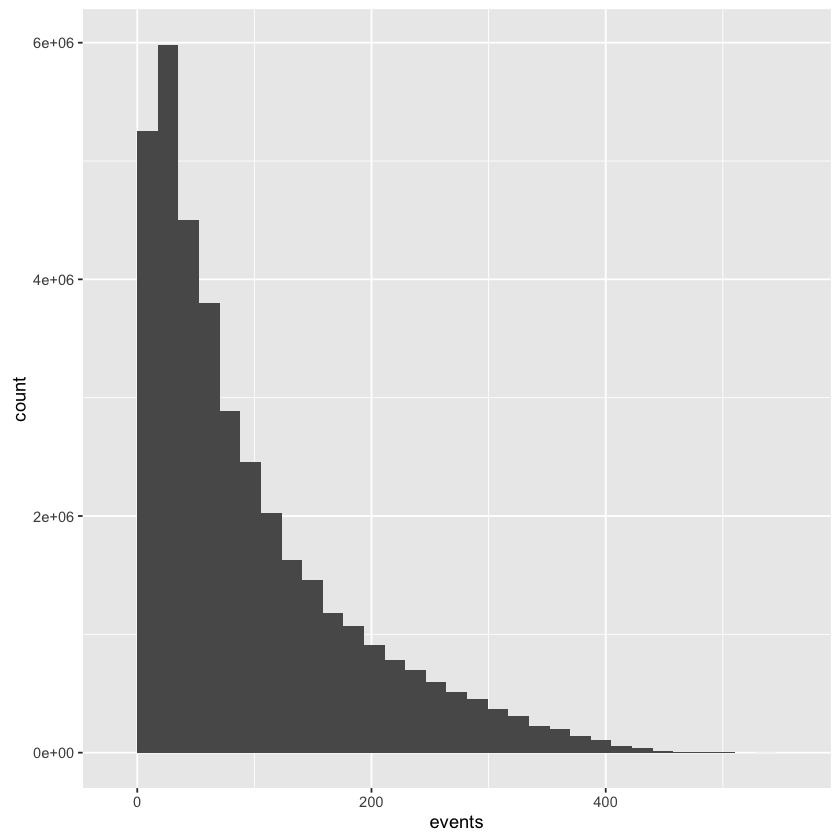

In [37]:
qplot(events, data = Traindf, geom = 'histogram')

In [39]:
Traindf[, .(median(events), mean(events))]

,V1,V2
1,67,96.02426


## Notes

`site_name` should perfectly predict `posa_continent` 

In [10]:
Traindf[,table(site_name, posa_continent)]

         posa_continent
site_name        0        1        2        3        4
       2         0        0        0 23790351        0
       3         0        2        0        0        0
       4         0        5        0        0        0
       5         0       11        0        0        0
       6     13748        0        0        0        0
       7         0    33522        0        0        0
       8         0        0        0        0   943325
       9         0    39882        0        0        0
       10    98754        0        0        0        0
       11        0        0        0  2605866        0
       13        0   695341        0        0        0
       14        0    52927        0        0        0
       15        0    84258        0        0        0
       16        0     6686        0        0        0
       17        0   372084        0        0        0
       18        0        0   258955        0        0
       19        0        0        0    1

* `is_booking` is missing from testData; should one discard events which are not bookings? A simple solution is to but an `is_booking` = 1 in the test data
* Clusters can be spread among multiple countries and continents
* The adjusted R^2 of a regression of `factor(hotel_cluster) ~ origin_destination_distance` is  ~ 0.24; the mutual information is about the same.


* `hotel_cluster` should go to a factor
* for each hotel_cluster summarize the # of different distances it can take
* There are about 100 categories to predict -> airbnb ranking? training different classifiers on different portions of data?
* Thre does not seem to be a strong class imbalance in `hotel_cluster`
* A feature easy to engineering in # of events per user
* Each user in test is in train but 17209 in train are NOT in test
* analyze relatinship of cluster with distance to destination


In [8]:
sampsub <- fread('../data/sample_submission.csv')

In [9]:
head(sampsub)

,id,hotel_cluster
1,0,99 1
2,1,99 1
3,2,99 1
4,3,99 1
5,4,99 1
6,5,99 1


In [18]:
dests <- fread('../data/destinations.csv')

In [19]:
head(dests)

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,ellip.h,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
1,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,<8b>,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
2,1,-2.18169,-2.18169,-2.18169,-2.082564,-2.18169,-2.165028,-2.18169,-2.18169,-2.031597,<8b>,-2.165028,-2.18169,-2.165028,-2.18169,-2.18169,-2.165028,-2.18169,-2.18169,-2.18169,-2.18169
3,2,-2.18349,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,<8b>,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
4,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,<8b>,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
5,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,<8b>,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037
6,5,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.155473,-2.174489,-2.174489,-2.174489,<8b>,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489,-2.174489


In [20]:
dim(dests)

[1] 62106   150

# Create smaller dataframes of 10000 users
    

In [65]:
uuser <- Testdf[, unique(user_id)]

set.seed(32)
samp_user <- uuser[sample(1:length(uuser),10000)]

smallTraindf <- Traindf[user_id %in% samp_user, ]
smallTestdf <- Testdf[user_id %in% samp_user, ]

In [69]:
write.table(smallTraindf, '../data/small-train.csv',
                              sep = ",", row.names=FALSE, quote=FALSE) 
write.table(smallTestdf, '../data/small-test.csv',
                              sep = ",", row.names=FALSE, quote=FALSE) 

# Interaction `hotel_cluster`, `orig_destination_distance`

In [34]:
hotelDist <- Traindf[, .(hotel_cluster, orig_destination_distance)]
# hotelDist[['hotel_cluster']] <- factor(hotelDist[['hotel_cluster']]) # omit for use with discretize2d
hotelDist <- hotelDist[!is.na(orig_destination_distance), ]

In [35]:
correlize(hotelDist[1:1000000,])

Compute numerical correlations
Time elapsed
   user  system elapsed 
  0.034   0.005   0.039 


,hotel_cluster,orig_destination_distance
hotel_cluster,1.000000000,0.005310467
orig_destination_distance,0.005310467,1.000000000


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 370247 rows containing non-finite values (stat_bin).

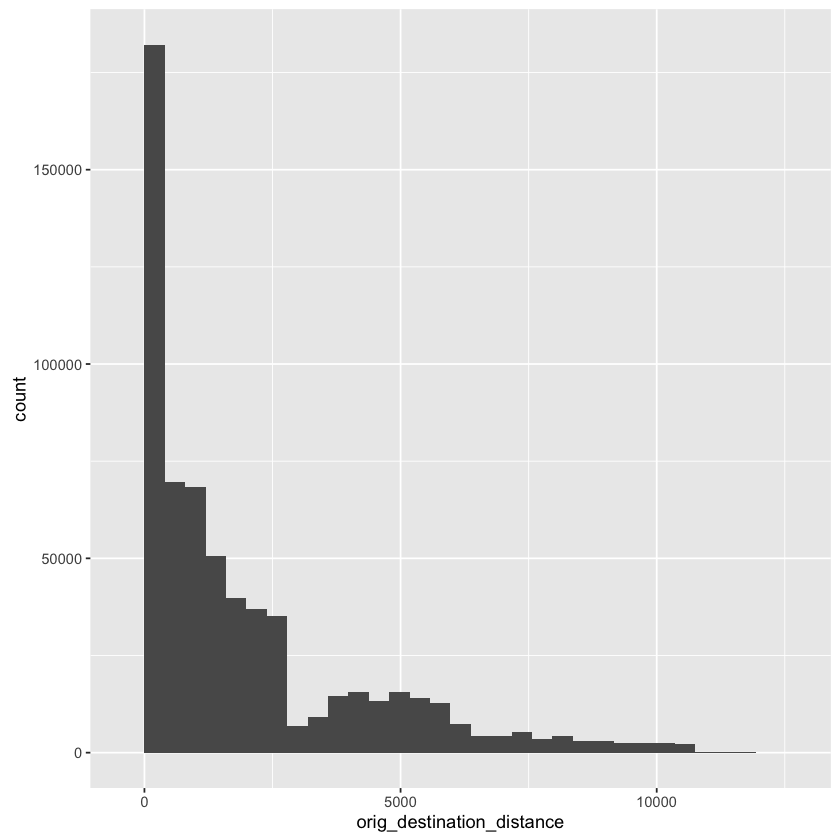

In [21]:
qplot(orig_destination_distance, data = hotelDist, geom = 'histogram')

Warning message:
: Removed 370247 rows containing non-finite values (stat_density).

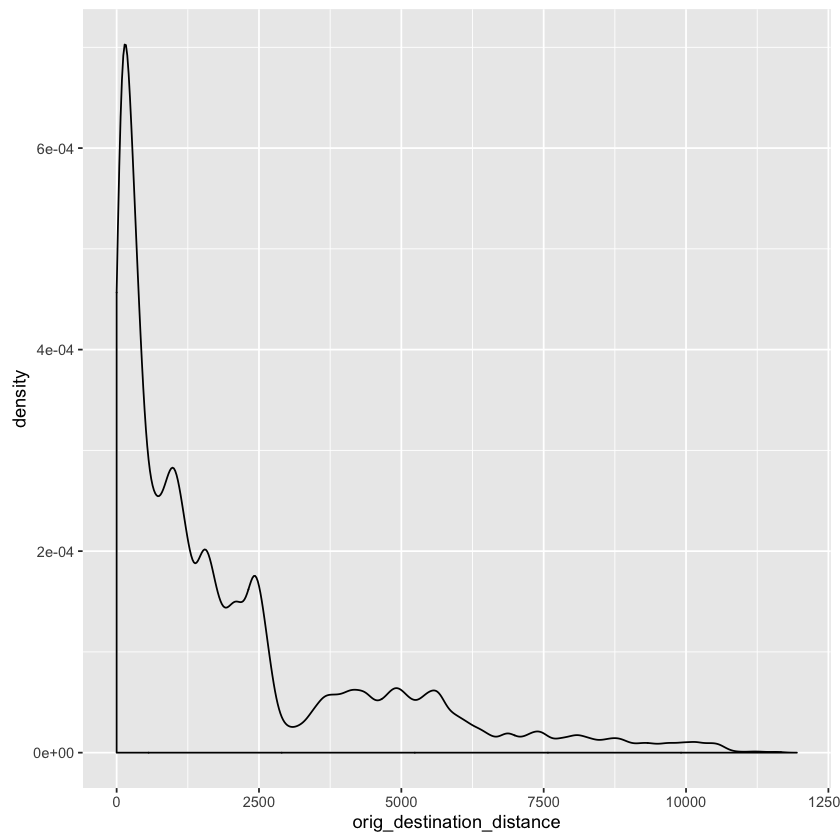

In [22]:
qplot(orig_destination_distance, data = hotelDist, geom = 'density')

In [23]:
library(entropy)

In [40]:
disc <- discretize2d(hotelDist[,orig_destination_distance], hotelDist[, hotel_cluster], numBins1 = 50, numBins2 = 99)

In [44]:
mi.empirical(disc)
chi2indep.plugin(disc)
mi.plugin(disc)

[1] 0.2192075

[1] 0.5225739

[1] 0.2192075

## To fix
Missing user_ids in test: cannot add these features

In [ ]:
# simple features on test
dfTest[, num_test_bookings := .N, by = user_id]
dfTest[, num_test_continents := length(unique(posa_continent)), by = user_id]
dfTest[, num_test_test_orig_city := length(unique(user_location_city)), by = user_id]
dfTest[, num_test_orig_country := length(unique(user_location_country)), by = user_id]
dfTest[, num_test_orig_region := length(unique(user_location_region)), by = user_id]
dfTest[, num_test_srch_destination_id := length(unique(srch_destination_id)), by = user_id]
dfTest[, num_test_srch_destination_type_id := length(unique(srch_destination_type_id)), by = user_id]

toTrain <- c('num_test_bookings', 'num_test_continents', 'num_test_test_orig_city', 'num_test_orig_country', 
             'num_test_orig_region', 'num_test_srch_destination_id', 'num_test_srch_destination_type_id')

locTest <-  dfTest[!duplicated(user_id), c('user_id', toTrain), with = FALSE]

missing_users <- setdiff(dfTrain[,unique(user_id), dfTest[, unique(user_id)]])